In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.8554 - loss: 0.4877 - val_accuracy: 0.9814 - val_loss: 0.0651
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.9704 - loss: 0.0985 - val_accuracy: 0.9867 - val_loss: 0.0431
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 94ms/step - accuracy: 0.9754 - loss: 0.0797 - val_accuracy: 0.9848 - val_loss: 0.0468
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 92ms/step - accuracy: 0.9806 - loss: 0.0644 - val_accuracy: 0.9902 - val_loss: 0.0325
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 93ms/step - accuracy: 0.9830 - loss: 0.0543 - val_accuracy: 0.9893 - val_loss: 0.0381
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.9859 - loss: 0.0453 - val_accuracy: 0.9897 - val_loss: 0.0345
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 68s 90ms/step - accuracy: 0.9860 - loss: 0.0454 - val_accuracy: 0.9911 - val_loss: 0.0308
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.9867 - loss: 0.0413 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9897 - loss: 0.0333
Test Accuracy: 0.991599977016449


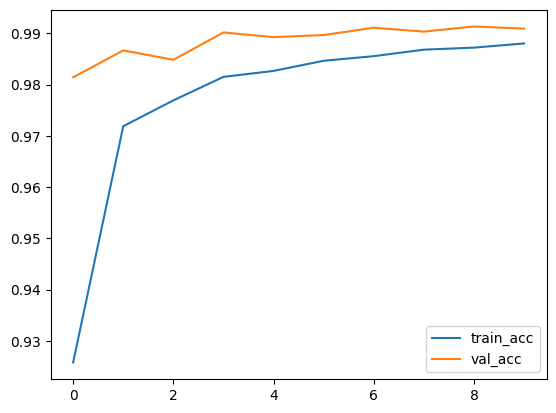

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()